# MNIST Digit Classification with Deep Learning (Neural Network)

Build a neural network with TensorFlow and Keras to recognize handwritten digits from the MNIST dataset. Train, evaluate, and use it to make predictions, which you then visualize.

**Project Overview**

This project aims to develop a system that can recognize handwritten digits using a neural network trained on the MNIST dataset. The system takes an input image of a handwritten digit, processes it to be compatible with the trained neural network, and predicts the digit. The entire pipeline includes data preprocessing, model training, evaluation, and real-time prediction on new images.

**Dataset**

The [MNIST dataset](https://keras.io/api/datasets/mnist/) is a benchmark dataset in the field of machine learning and computer vision, widely used for training and testing image processing systems. It consists of 70,000 grayscale images of handwritten digits from 0 to 9, with each image being 28x28 pixels in size. The dataset is divided into two parts: 60,000 images for training and 10,000 images for testing. Each image is labeled with the corresponding digit it represents, making it an excellent resource for classification tasks. The simplicity and size of the MNIST dataset make it ideal for demonstrating the capabilities of neural networks and other machine learning algorithms in recognizing handwritten digits.

**Import Dependencies**

In [176]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
from PIL import Image

import tensorflow as tf
tf.random.set_seed(3)

from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

**Load the MNIST data from keras.datasets**

In [177]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [178]:
type(X_train)

numpy.ndarray

In [179]:
# shape of the numpy array
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


- Training data  = 60,000 images

- Test data = 10,000 images

- image dimensions = 28 x 28

- grayscale image = 1 channel

In [180]:
# print the 30th image
print(X_train[29])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [181]:
# Check single image dimension
print(X_train[29].shape)

(28, 28)


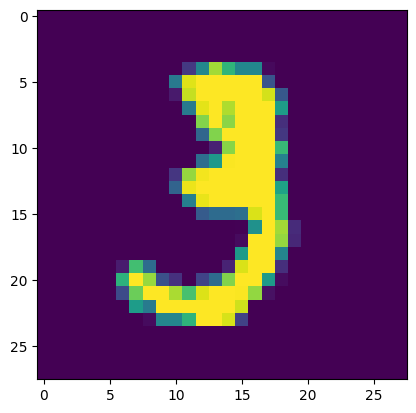

3


In [182]:
# display the image

plt.imshow(X_train[10])
plt.show()

# print the corresponding label
print(y_train[10])

**Image labels**

In [183]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [184]:
# Unique values in y_train
print(np.unique(y_train))

# Unique values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


- We can use these labels as is or we can apply One Hot Encoding

- All the images have the same dimensions in this dataset. Otherwise, we have to resize them to a common dimension(Images with different dimensions cannot be put in the same array because it won't be compartible)

In [185]:
# scale/normalize the values

X_train  = X_train/255
X_test = X_test/255

In [186]:
# print the 10th image
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**Building the Neural Network**

In [187]:
# Set up the layer of the Neural network

model = keras.Sequential([
                            keras.layers.Flatten(input_shape=(28,28)),
                            keras.layers.Dense(50, activation = 'relu'),
                            keras.layers.Dense(50, activation = 'relu'),
                            keras.layers.Dense(10, activation = 'sigmoid')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [188]:
# Compile the Neural Network
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [189]:
# Training the Neural Network
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8548 - loss: 0.5099
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9540 - loss: 0.1560
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9661 - loss: 0.1110
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9734 - loss: 0.0857
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9783 - loss: 0.0697
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9817 - loss: 0.0585
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9857 - loss: 0.0488
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9867 - loss: 0.0429
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9883 - loss: 0.0381
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9896 - loss: 0.0333


- training data accuracy is 93.04%

**Accuracy on test data**

In [190]:
# Accuracy on test data

loss, accuracy = model.evaluate(X_test, y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9633 - loss: 0.1479
0.9670000076293945


- testing data accuracy is 92.15%

In [191]:
print(X_test.shape)

(10000, 28, 28)


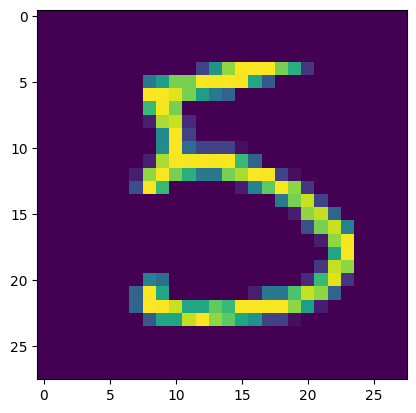

In [192]:
# 16th data point in X_test
plt.imshow(X_test[15])
plt.show()

In [193]:
print(y_test[15])

5


In [194]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [195]:
print(y_pred.shape)

(10000, 10)


In [196]:
print(y_pred[15])

[4.1341224e-08 1.1925431e-03 2.2274438e-05 9.8631221e-01 1.4325245e-06
 1.0000000e+00 9.7127713e-07 5.9021090e-09 1.1557116e-01 7.5700306e-03]


- model.predict() gives the prediction probability of each class for that data point

In [197]:
# Convert the prediction probabilities to class label 

label_for_16th_test_image = np.argmax(y_pred[15])
print(label_for_16th_test_image)

5


- 5 means the value in the 16th data point that is the maximum(start counting from 0) 
- it's the index of the maximum number in your array(compared to other values)

In [198]:
# Convert the prediction probabilities to class label for all data points
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 4, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

- y_test = true labels
- y_pred labels = predicted labels

**Confusion Matrix**

In [199]:
conf_mat = confusion_matrix(y_test, y_pred_labels)

In [200]:
print(conf_mat)

tf.Tensor(
[[ 945    1    1    1    6    2    2    0    1   21]
 [   0 1113    0    5    0    1    4    2    8    2]
 [   6    1  975   25    4    0    3    7    9    2]
 [   0    0    3  990    1    2    0    2    7    5]
 [   1    0    4    0  953    0    5    2    2   15]
 [   3    0    0   10    1  864    4    2    6    2]
 [   3    2    2    1    8    4  933    2    3    0]
 [   0    2   10    1    4    1    0  982    3   25]
 [   3    0    2   15    6    4    3    4  928    9]
 [   2    1    0    5    6    3    1    5    1  985]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

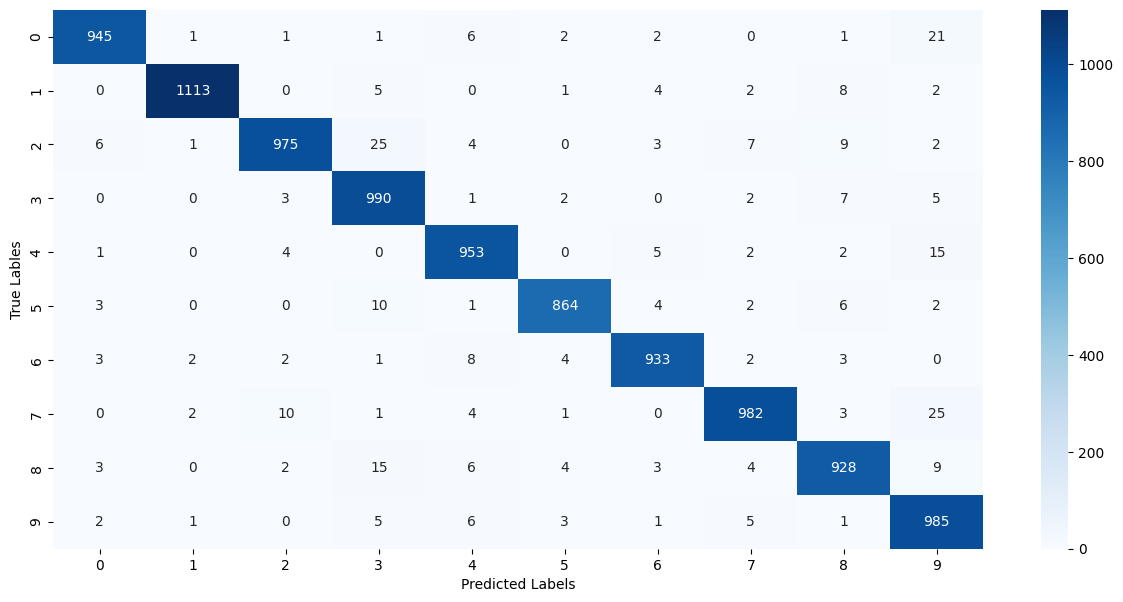

In [201]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Lables')
plt.xlabel('Predicted Labels')

**Building a predictive system**

In [202]:
input_image_path = '/kaggle/input/image-mnist/MNIST_digit.png'
input_image = cv2.imread(input_image_path)

In [203]:
type(input_image)

numpy.ndarray

In [204]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


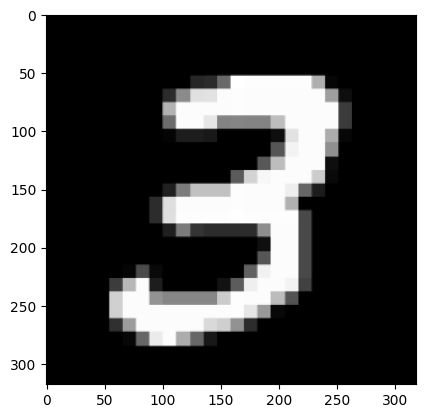

In [205]:
plt.imshow(input_image)


In [206]:
input_image.shape

(318, 318, 3)

In [207]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [208]:
grayscale.shape

(318, 318)

In [209]:
# Resize the image dimensions to be compartible with the Neural networks that we built 

input_image_resize = cv2.resize(grayscale,(28,28))

In [210]:
input_image_resize.shape

(28, 28)

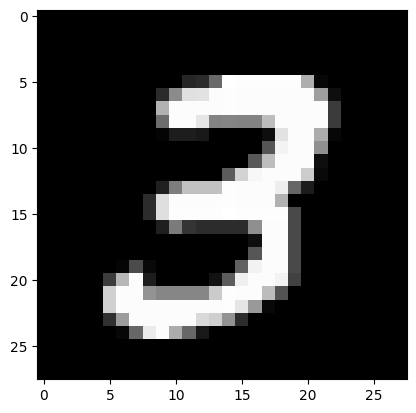

In [211]:
# Plot the resized image
plt.imshow(input_image_resize, cmap='gray')



In [212]:
# scale/normalize image to values between 0 and 1
input_image_resize = input_image_resize/255

In [213]:
type(input_image_resize)

numpy.ndarray

In [214]:
# Reshape image
image_reshaped = np.reshape(input_image_resize, [1, 28, 28])

In [215]:
# Predict the input
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[5.4624352e-12 3.8321778e-06 1.4791815e-05 1.0000000e+00 3.7112333e-13
  2.4215507e-03 4.0616445e-16 1.3934978e-06 6.5554428e-01 2.0011356e-02]]


In [216]:
# Input prediction label
input_pred_label = np.argmax(input_prediction)

In [217]:
print(input_pred_label)

3


**Predictive system**

Path of the image to be predicted:  /kaggle/input/image-mnist/MNIST_digit.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
The Handwritten digit is recognized as  3


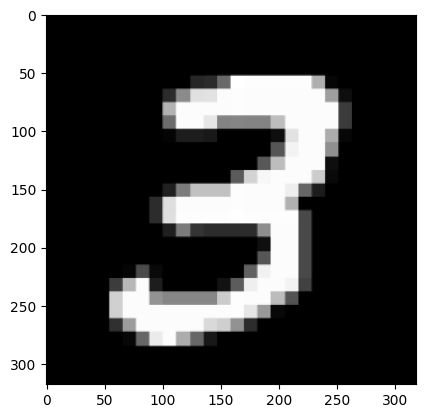

In [218]:
# Input image(s)
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)

# Display image input
plt.imshow(input_image)

# Convert image to grayscale
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

# Resize the image dimensions to be compartible with the Neural networks that we built 
input_image_resize = cv2.resize(grayscale,(28,28))

# scale/normalize image to values between 0 and 1
input_image_resize = input_image_resize/255

# Reshape image
image_reshaped = np.reshape(input_image_resize, [1, 28, 28])

# Predict the input
input_prediction = model.predict(image_reshaped)

# Input prediction label
input_pred_label = np.argmax(input_prediction)

print('The Handwritten digit is recognized as ', input_pred_label)